# Analysis of Top 200 Movies at Worldwide Box Office from 2000 to 2017

__ __

### Steps:

* step 0 web scraping and data cleaning
 * acquire the data from the box office Mojo 
 * after data cleaning, save it into boxoffice.csv file
 * you can this process in $WEB SCRAPING OF Box Office .ipynb$
* step 1 statistical analysis of top 200 movies at worldwide box office from 2000 to 2017
 * descriptive analysis
* step 2 specific analysis of 2017 top 200 movies at worldwide box office
* step 2 detailed analysis of movies that have different domestic and Chinese box office 
 * it is based on 7 movies among 2017 top 200 movies 
 * you can this process in $WEB SCRAPING OF Box Office .ipynb$

__ __

## step 0 web scraping and data cleaning

You can this process in WEBSCRAPINGOFBoxOffice.ipynb file. The final result of this process is the boxoffice.csv file

In [600]:
import pandas as pd
import numpy as np
import plotnine as gg
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [448]:
df=pd.read_csv('boxoffice.csv')

In [449]:
df.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link
0,2000,1,Mission: Impossible II,Par.,546.4,215.4,331.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
1,2000,2,Gladiator,DW,457.6,187.7,269.9,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
2,2000,3,Cast Away,Fox,429.6,233.6,196.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
3,2000,4,What Women Want,Par.,374.1,182.8,191.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
4,2000,5,Dinosaur,BV,349.8,137.7,212.1,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...


__ __

## step 1 statistical analysis of top 200 movies at worldwide box office from 2000 to 2017

__step 1.0 First turn the box office into real dollars instead of nominal dollars. We acquire the CPI-All Urban Consumers (U.S. Recreation) data from U.S. Labour of Statistics. __

First turn the box office into real dollars instead of nominal dollars. We acquire the CPI-All Urban Consumers (U.S. Recreation) data from U.S. Labour of Statistics.

CPI-All Urban Consumers (Current Series)

Series Id:     CUUR0000SAR
Not Seasonally Adjusted
Series Title:  Recreation in U.S. city average, all urban consumers, not seasonally adjusted
Area:          U.S. city average
Item:          Recreation
Base Period:   DECEMBER 1997=100

In [601]:
#download CPI-All Urban Consumers (Current Series) 
#U.S. Recreation, 1982-84=100 - CUUR0000SAR
#from https://data.bls.gov/pdq/SurveyOutputServlet
Year=list(range(2000,2018))
CPI=[103.3,104.9,106.2,107.5,108.6,109.4,110.9,111.443,113.254,114.272,113.313,113.357,114.703,115.266,115.543,115.941,116.984,118.504]

In [602]:
dict={"Year":Year,
      "CPI":CPI}
cpirate=pd.DataFrame(dict)

In [603]:
df1=pd.merge(df,cpirate)

Nominal & Real Dollars
Consumer price index data can be used to convert nominal dollars to real dollars. The formula is

$$ (real \$) = (nominal $) ·CPIb/CPIy $$
where b is the base year and y is the nominal dollars year. 
In this case, we take 2017 as the base year.
Based on: http://itech.fgcu.edu/faculty/bhobbs/Nominal%20Real%20Price%20Index.htm

In [604]:
CPI2017=cpirate[cpirate['Year']==2017]['CPI']
print(CPI2017)

17    118.504
Name: CPI, dtype: float64


In [605]:
df1['Worldwide']=df1['Worldwide']*118.504/df1['CPI']
df1['Domestic']=df1['Domestic']*118.504/df1['CPI']
df1['Overseas']=df1['Overseas']*118.504/df1['CPI']

In [606]:
df1=df1.round({'Worldwide': 1, 'Domestic': 1,'Overseas':1})

Now the box office is turned into real dollars based on 2017.

In [607]:
df1.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link,CPI
0,2000,1,Mission: Impossible II,Par.,626.8,247.1,379.7,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3
1,2000,2,Gladiator,DW,525.0,215.3,309.6,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3
2,2000,3,Cast Away,Fox,492.8,268.0,224.8,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3
3,2000,4,What Women Want,Par.,429.2,209.7,219.5,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3
4,2000,5,Dinosaur,BV,401.3,158.0,243.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,103.3


__step 1.1 First turn the box office into real dollars instead of nominal dollars. We acquire the CPI-All Urban Consumers (U.S. Recreation) data from U.S. Labour of Statistics. __

In [922]:
groupsum=df1.groupby(['Year']).agg({'Year':np.mean,'Worldwide': np.sum,'Domestic': np.sum,'Overseas': np.sum})
box_office=groupsum['Worldwide'].append(groupsum['Domestic'])
box_office=box_office.append(groupsum['Overseas'])
cat=['Worldwide']*18+['Domestic']*18+['Overseas']*18
year=list(range(2000,2018))*3

groupsum1=pd.DataFrame({'BoxOffice':box_office,'Catlogue':cat,'Year':year})
groupsum1.head()

,BoxOffice,Catlogue,Year
Year,,,
2000,15939.4,Worldwide,2000
2001,17436.9,Worldwide,2001
2002,19482.5,Worldwide,2002
2003,19981.0,Worldwide,2003
2004,20677.6,Worldwide,2004


In [925]:
group1=df1.groupby(['Year']).agg({'Year':np.mean,'Worldwide': np.sum})

In [928]:
gruop1=pd.DataFrame(df1.groupby(['Year']).agg({'Year':np.mean,'Worldwide': np.sum}))
gruop2=pd.DataFrame(df1.groupby(['Year']).agg({'Year':np.mean,'Domestic': np.sum}))
gruop3=pd.DataFrame(df1.groupby(['Year']).agg({'Year':np.mean,'Overseas': np.sum}))

Though we considerate about the CPI rate, turn the box office data into real dolloars, the worldwide, domestic and overseas boxoffice 

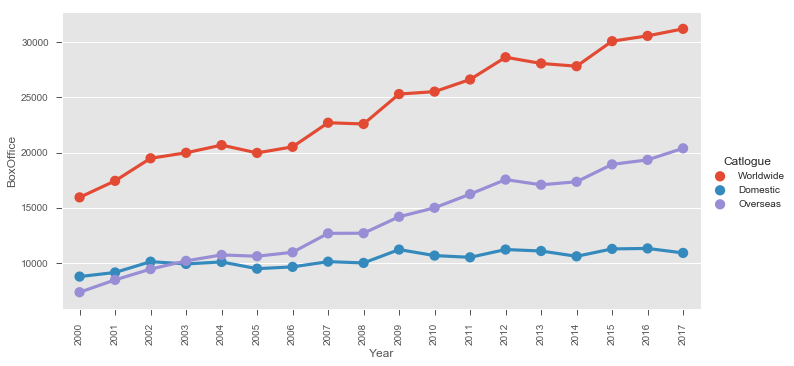

In [935]:
g=sns.factorplot(data=groupsum1, x="Year", y='BoxOffice', style="ticks",hue='Catlogue',size=5, aspect=2)
g.set_xticklabels(rotation = 90)

[Text(0,0,'2000'),
 Text(0,0,'2001'),
 Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017')]

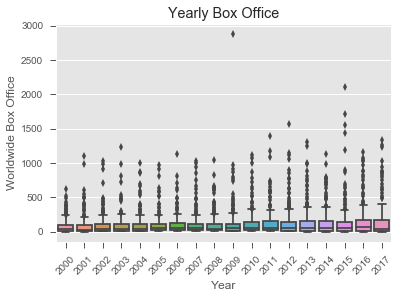

In [655]:
ax = sns.boxplot(x = "Year", y = "Worldwide", data =df1)
ax.set(title = "Yearly Box Office", xlabel = "Year", ylabel = "Worldwide Box Office")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [815]:
def df2(n):
    year=[]
    box_office=[]

    for i in range(2000,2018):
        year1=list([i]*3*n)
        year=year+year1
    
        data1=df1[df1['Year']==i]['Worldwide'][0:n].append(df1[df1['Year']==i]['Domestic'][0:n])
        data1=data1.append(df1[df1['Year']==i]['Overseas'][0:n])
        box_office+=list(data1)
    
    cat=list((['Worldwide']*n+['Domestic']*n+['Overseas']*n)*18)
    df2=pd.DataFrame({'Year':year,'Boxoffice':box_office,'Category':cat})
    df2=df2[['Year','Boxoffice','Category']]
    return df2

In [885]:
def boxplot(n):
    dataframe=df2(n)
    ax = sns.boxplot(x="Year",y="Boxoffice", hue="Category",
                 data=dataframe, palette="Set3")
    ax.set(title = "Yearly Top "+str(n)+" Box Office", xlabel = "Year", ylabel = "Box Office")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    return ax

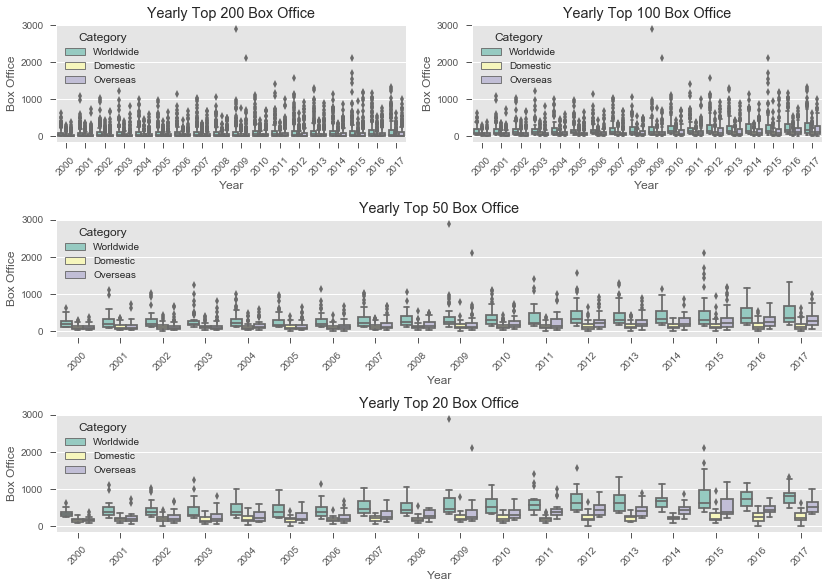

In [921]:
plt.subplot(321) 
ax1=boxplot(200)

plt.subplot(322)
ax2=boxplot(100)

plt.subplot(312)
ax3=boxplot(50)

plt.subplot(313)
ax4=boxplot(20)
plt.tight_layout()

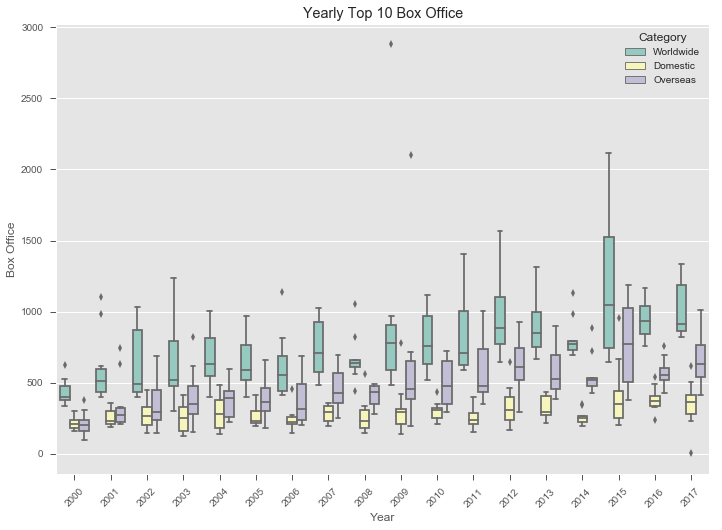

In [886]:
boxplot(10)

In [625]:
groupsum=pd.merge(gruop1,gruop2)
groupsum=pd.merge(groupsum,gruop3)
groupsum

,Year,Worldwide,Domestic,Overseas
0,2000,15939.4,8759.0,7338.8
1,2001,17436.9,9130.5,8459.7
2,2002,19482.5,10109.6,9437.6
3,2003,19981.0,9904.3,10183.2
4,2004,20677.6,10085.4,10721.8
5,2005,19969.0,9474.3,10602.6
6,2006,20520.9,9638.3,10960.9
7,2007,22706.1,10110.6,12676.6
8,2008,22594.0,9996.6,12689.9
9,2009,25305.5,11206.3,14182.6


__step 1.1 Which film has the highest worldwide box office? Domestic? Overseas? __

# step 1 statistical analysis of top 200 movies at worldwide box office from 2000 to 2017

In [1022]:
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud


In [1023]:
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

We do not considerate stopwords in films' names.

In [1035]:
stopwords = ['IMAX','movie','3D']

In [1036]:
def newtext(text):
    '''Return a new text after the stopwords and lemmatizing'''
    blob = TextBlob(text)
    new_text = " ".join(w for w in blob.words if w.lower() not in stopwords)
    blob = TextBlob(new_text)
    tags = [wordnet_pos(x[1]) for x in blob.pos_tags]
    new_text = " ".join(x.lemmatize(t) for x, t in zip(blob.words, tags))
    blob = TextBlob(new_text)
    return new_text

In [1037]:
def ReturnCount(text):
    '''Return a word counts dictionary'''
    new=newtext(text)
    blob = TextBlob(new)
    return blob.word_counts  

In [1038]:
def countdata(text):
    '''
    Sort the counts of each distinct word
    input:text(string)
    output:datafrane of the word counts dictionary
    '''
    dic=ReturnCount(text)
    count=pd.DataFrame(list(dic.items()), columns=['word', 'count'])
    return count

In [1039]:
def countsort(text):
    '''
    sort the countdata
    input:text(string)
    output:dataframe of 10 most frequent words and their counts
    '''
    df1=countdata(text)
    newdf=df1.sort_values(by='count', ascending=False).head(10)
    return newdf

In [1040]:
def barplot(text):
    '''
    input:text(string)
    output:barplot of the most frequent words and counts
    '''
    data=countsort(text)
    new=newtext(text)
    plt.rcParams['figure.figsize'] = (10, 10)
    sns.set(font_scale = 1.5)

    sns.set_style("whitegrid")
    fruit_bar = sns.barplot(x = "word", y = "count", data =data)
    for item in fruit_bar.get_xticklabels():
        item.set_rotation(20)
    plt.title('Count of Unique Words in Movie Names')
    fruit_bar.set(ylabel = 'Count', xlabel = 'Word')
    p=plt.show()
    return p

In [1041]:
def wordcloud(text):
    '''
    input:text(string)
    output:wordcloud of the text
    '''
    data=countsort(text)
    new=newtext(text)

    # Generate a word cloud image
    wordcloud = WordCloud().generate(new)

   # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(new)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('wordcloud of movie names')
    p=plt.show()
    return p


In [1042]:
name=' '.join([str(i) for i in df1['Title']])
countsort(name)

,word,count
11,the,1162
115,of,319
24,s,145
296,a,127
63,and,124
30,in,101
139,2,101
83,to,69
46,man,51
258,i,46


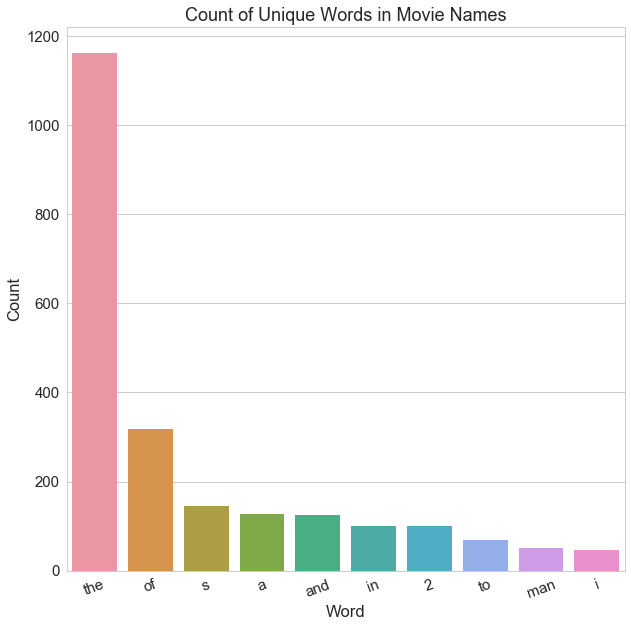

In [1043]:
barplot(name)

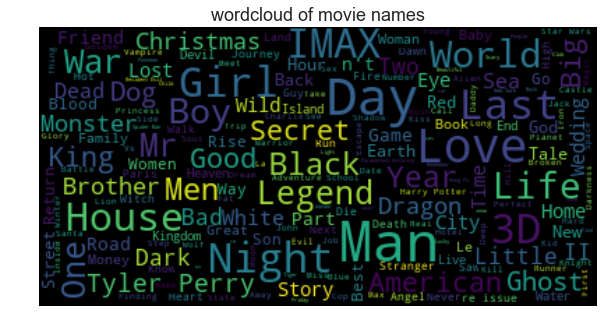

In [1044]:
wordcloud(name)

# step 1 statistical analysis of top 200 movies at worldwide box office from 2000 to 2017

In [936]:
boxoffice=df[df['Year']==2017].reset_index(drop=True) 
boxoffice.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link
0,2017,1,Star Wars: The Last Jedi,BV,1331.9,619.7,712.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
1,2017,2,Beauty and the Beast (2017),BV,1263.5,504.0,759.5,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
2,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
3,2017,4,Despicable Me 3,Uni.,1034.8,264.6,770.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...
4,2017,5,Jumanji: Welcome to the Jungle,Sony,938.5,399.1,539.4,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...


In [937]:
sum(boxoffice['Domestic'])/sum(boxoffice['Worldwide'])

0.34926721445389464

__What's the domestic part and overseas 

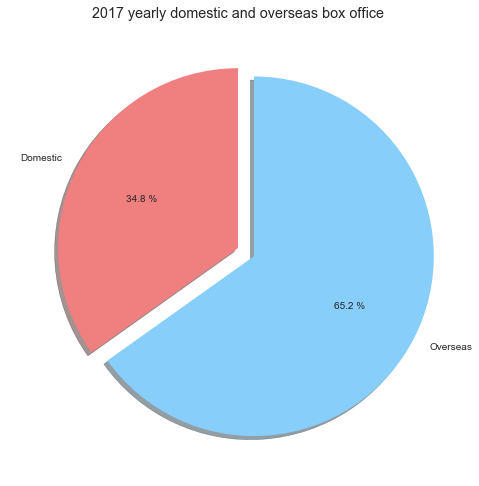

In [938]:
labels = 'Domestic', 'Overseas'
fracs = [sum(boxoffice['Domestic']),sum(boxoffice['Overseas'])]
explode = [0, 0.1]
plt.axes(aspect=1)  
colors = ['lightcoral', 'lightskyblue']
plt.title('2017 yearly domestic and overseas box office')
plt.pie(x=fracs, labels=labels, explode=explode,autopct='%3.1f %%', colors=colors,
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5C2F889B0>,
      dtype=object)

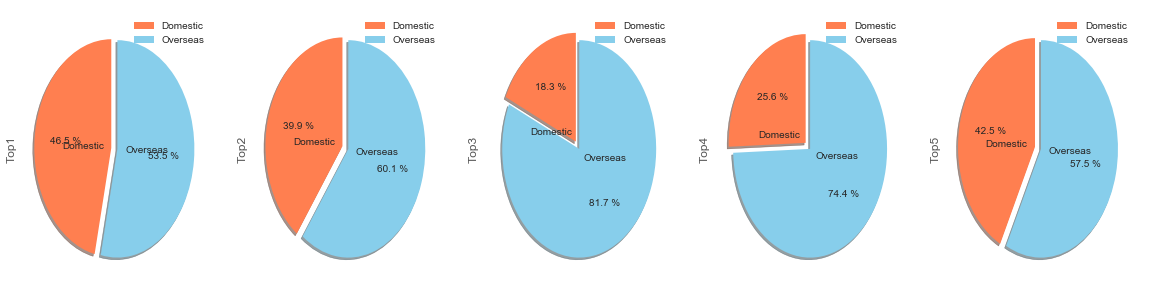

In [939]:
Top1to5=boxoffice.loc[0:4,['Domestic','Overseas']]
Top1to5.index = ['Top1','Top2','Top3','Top4','Top5']
Top1to5.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['coral', 'skyblue'],
                explode = (0.08, 0),shadow=True, labeldistance=0.1, startangle = 90,pctdistance = 0.6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5C327C5C0>,
      dtype=object)

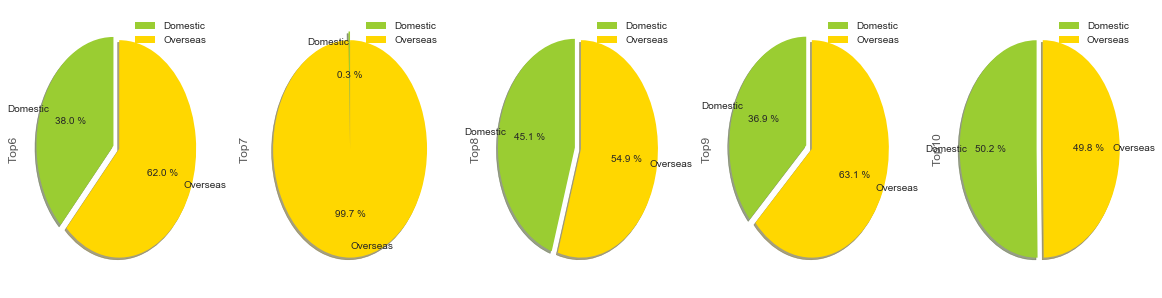

In [940]:
Top6to10=boxoffice.loc[5:9,['Domestic','Overseas']]
Top6to10.index = ['Top6','Top7','Top8','Top9','Top10']
Top6to10.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['yellowgreen', 'gold'],
                explode = (0.08, 0),shadow=True, labeldistance=0.9, startangle = 90,pctdistance = 0.6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5C3407B00>,
      dtype=object)

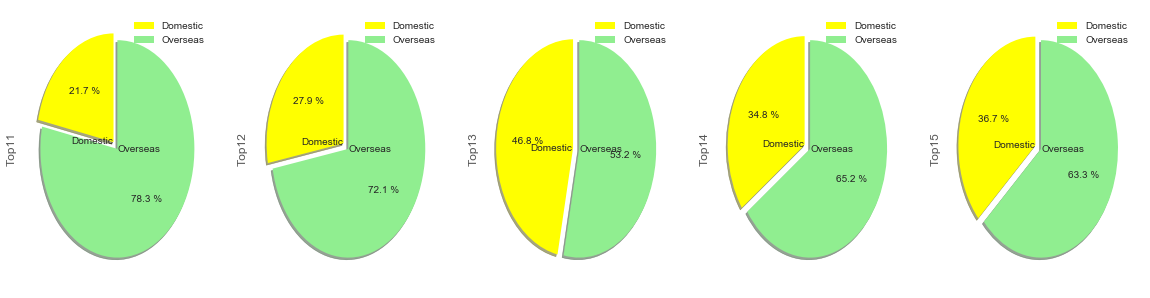

In [941]:
Top11to15=boxoffice.loc[10:14,['Domestic','Overseas']]
Top11to15.index = ['Top11','Top12','Top13','Top14','Top15']
Top11to15.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['yellow', 'lightgreen'],
                explode = (0.08, 0),shadow=True, labeldistance=0.01, startangle = 90,pctdistance = 0.6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5C36EF390>,
      dtype=object)

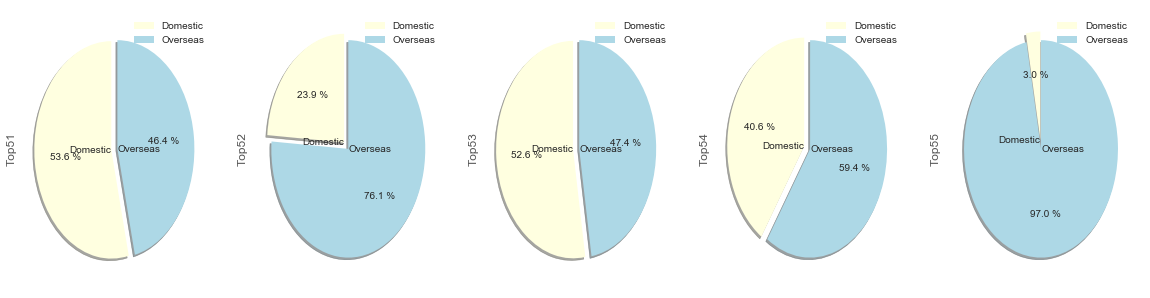

In [942]:
Top51to55=boxoffice.loc[50:54,['Domestic','Overseas']]
Top51to55.index = ['Top51','Top52','Top53','Top54','Top55']
Top51to55.T.plot.pie(subplots=True, figsize=(20, 5),autopct='%2.1f %%', colors=['lightyellow', 'lightblue'],
                explode = (0.08, 0),shadow=True, labeldistance=0.001, startangle = 90,pctdistance = 0.6)

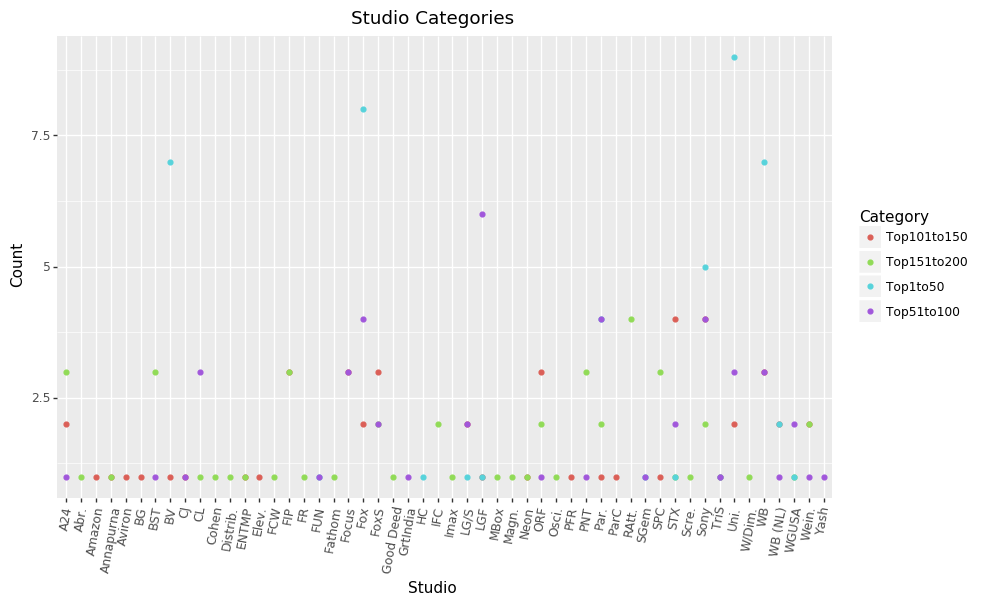

<ggplot: (-9223371850624570792)>

In [943]:
(gg.ggplot(boxoffice, gg.aes(x = "Studio", color = "Category")) + 
 gg.geom_point(stat = "count")+
 gg.theme(figure_size=(10, 6),axis_text_x=gg.element_text(rotation=80))+ 
 gg.labs(title = "Studio Categories", x = "Studio", y = "Count")
)

In [944]:
studio=boxoffice.drop(boxoffice.columns[[0,1]], axis=1, inplace=True)

In [945]:
studio=boxoffice.groupby('Studio').sum()

In [946]:
studio.sort_values(by='Worldwide',ascending=False).head(10)

,Worldwide,Domestic,Overseas
Studio,,,
BV,6266.5,2377.0,3889.3
Uni.,4760.0,1453.0,3307.0
WB,3767.7,1479.4,2288.5
Fox,3760.9,1338.2,2422.8
Sony,2905.6,1078.7,1844.9
Par.,1737.7,490.5,1247.3
WB (NL),1167.1,532.4,634.7
HC,870.3,2.7,867.6
LGF,796.5,421.5,375.2


In [947]:
studio.sort_values(by='Domestic',ascending=False).head(10)

,Worldwide,Domestic,Overseas
Studio,,,
BV,6266.5,2377.0,3889.3
WB,3767.7,1479.4,2288.5
Uni.,4760.0,1453.0,3307.0
Fox,3760.9,1338.2,2422.8
Sony,2905.6,1078.7,1844.9
WB (NL),1167.1,532.4,634.7
Par.,1737.7,490.5,1247.3
LGF,796.5,421.5,375.2
LG/S,499.3,279.2,220.2


In [948]:
studio.sort_values(by='Overseas',ascending=False).head(10)

,Worldwide,Domestic,Overseas
Studio,,,
BV,6266.5,2377.0,3889.3
Uni.,4760.0,1453.0,3307.0
Fox,3760.9,1338.2,2422.8
WB,3767.7,1479.4,2288.5
Sony,2905.6,1078.7,1844.9
Par.,1737.7,490.5,1247.3
HC,870.3,2.7,867.6
WB (NL),1167.1,532.4,634.7
WGUSA,440.0,9.2,435.9


## Big Six
Hollywood has long been ruled by the ‘Big Six’. These ‘Big Six’ are: 20th Century Fox, Warner Bros., Paramount Pictures, Columbia Pictures, Universal Pictures & Walt Disney Pictures. 


In [949]:
Big6=boxoffice[(boxoffice['Studio']=='BV')|(boxoffice['Studio']=='Fox')|
              (boxoffice['Studio']=='Sony')|(boxoffice['Studio']=='Par.')|
              (boxoffice['Studio']=='Uni.')|(boxoffice['Studio']=='WB')]

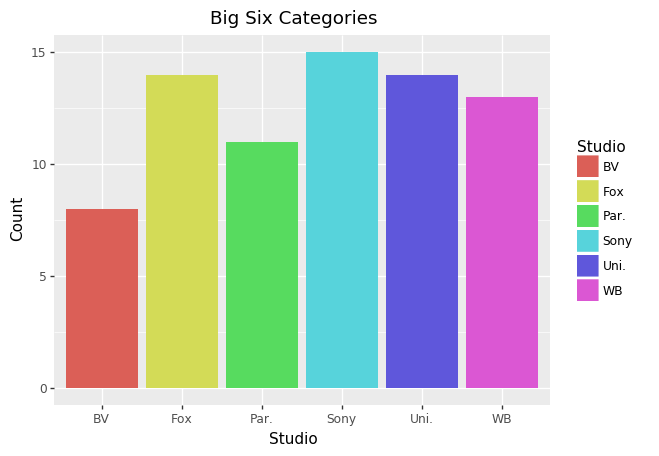

<ggplot: (186231190385)>

In [950]:
(gg.ggplot(Big6, gg.aes(x = "Studio",fill="Studio")) +
 gg.geom_bar(stat = "count",position='stack')+
 gg.labs(title = "Big Six Categories", x = "Studio", y = "Count")
)

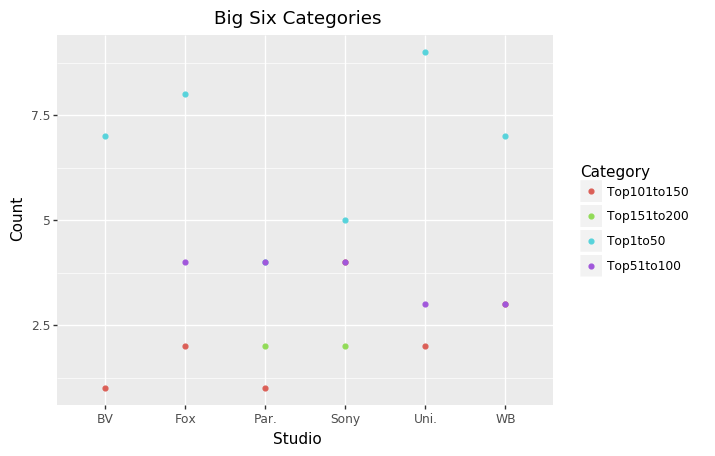

<ggplot: (186231253512)>

In [951]:
(gg.ggplot(Big6, gg.aes(x = "Studio", color = "Category")) + 
 gg.geom_point(stat = "count")+
 gg.labs(title = "Big Six Categories", x = "Studio", y = "Count")
)

In [952]:
sum(Big6['Domestic'])/sum(boxoffice['Domestic'])

0.7536343541626536

In [953]:
sum(Big6['Overseas'])/sum(boxoffice['Overseas'])

0.735818142574024

In [954]:
sum(Big6['Worldwide'])/sum(boxoffice['Worldwide'])

0.7431454519244625

In [955]:
boxoffice=df[df['Year']==2017].reset_index(drop=True) 

In [956]:
boxoffice['Dome_minus_Over']=(boxoffice['Overseas']-boxoffice['Domestic'])/boxoffice['Domestic']

In [957]:
boxoffice=boxoffice[-boxoffice["Overseas"].isin(['n/a'])]
boxoffice=boxoffice[-boxoffice["Domestic"].isin(['n/a'])]

In [958]:
boxoffice1=boxoffice[(boxoffice['Dome_minus_Over']>1)&(boxoffice['Dome_minus_Over']<60)]

In [959]:
selected=set(boxoffice1['Studio'])
selected

{'Amazon',
 'BV',
 'CJ',
 'CL',
 'Distrib.',
 'Elev.',
 'FIP',
 'FR',
 'FUN',
 'Fox',
 'FoxS',
 'GrtIndia',
 'IFC',
 'Par.',
 'SGem',
 'STX',
 'Sony',
 'TriS',
 'Uni.',
 'WB',
 'WB (NL)',
 'WGUSA',
 'Wein.',
 'Yash'}

Korea:CJ
German: SGem

In [960]:
data=boxoffice1[(boxoffice1['Studio']=='Amazon')|(boxoffice1['Studio']=='BG')|
                (boxoffice1['Studio']=='BV')|(boxoffice1['Studio']=='Fox')|
                (boxoffice1['Studio']=='STX')|(boxoffice1['Studio']=='Wein.')|
                (boxoffice1['Studio']=='Sony')|(boxoffice1['Studio']=='Par.')|
                (boxoffice1['Studio']=='Uni.')|(boxoffice1['Studio']=='WB')|
                (boxoffice1['Studio']=='WB (NL)')]
data=data.reset_index(drop=True) 
data.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link,Dome_minus_Over
0,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,3.469027
1,2017,4,Despicable Me 3,Uni.,1034.8,264.6,770.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,1.910809
2,2017,11,Pirates of the Caribbean: Dead Men Tell No Tales,BV,794.9,172.6,622.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,2.605446
3,2017,12,Coco,BV,749.1,209.0,540.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,1.583732
4,2017,16,Transformers: The Last Knight,Par.,605.4,130.2,475.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,2.650538


Fifty Shades Darker wasn't on China.

In [978]:
title=list(data['Title'])
title

['The Fate of the Furious',
 'Transformers: The Last Knight',
 'Kong: Skull Island',
 'Kingsman: The Golden Circle',
 'The Mummy (2017)',
 'xXx: The Return of Xander Cage',
 'The Great Wall',
 'Annabelle: Creation',
 'Journey to the West: The Demons Strike Back',
 'Valerian and the City of a Thousand Planets',
 'Geostorm',
 "A Dog's Purpose",
 'The Foreigner']

In [962]:
data['Link'][13]='http://www.boxofficemojo.com/movies/?page=intl&country=CH&id=residentevil6.htm'
Chinese=[]
for i in range(len(data)):
    url=data['Link'][i]
    html = urllib.request.urlopen(url)    
    bsObj = BeautifulSoup(html,'lxml-xml')
    list1=bsObj.findAll('b')
    x=list1[14].text
    Chinese.append(x)
data['Chinese']=Chinese

C:\Users\qxzhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [963]:
data=data[-data['Chinese'].isin(['Australia','Austria','India','Colombia','Belgium'])]
data=data.reset_index(drop=True) 
data.head()

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Link,Dome_minus_Over,Chinese
0,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,3.469027,"$392,807,017"
1,2017,4,Despicable Me 3,Uni.,1034.8,264.6,770.2,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,1.910809,"$158,171,566"
2,2017,11,Pirates of the Caribbean: Dead Men Tell No Tales,BV,794.9,172.6,622.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,2.605446,"$172,277,290"
3,2017,12,Coco,BV,749.1,209.0,540.0,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,1.583732,"$189,226,296"
4,2017,16,Transformers: The Last Knight,Par.,605.4,130.2,475.3,Top1to50,http://www.boxofficemojo.com/movies/?page=intl...,2.650538,"$228,842,508"


In [964]:
data['Chinese']=data['Chinese'].str.replace('$','')
data['Chinese']=data['Chinese'].str.replace(",","")

In [965]:
data.Chinese =pd.to_numeric(data.Chinese, errors='coerce').fillna(0).astype(float)
data.Chinese=data.Chinese/1000000

In [966]:
columns = ['Link', 'Dome_minus_Over']
data.drop(columns, inplace=True, axis=1)

In [967]:
data=data[data['Chinese']>data['Domestic']]

In [968]:
data=data.reset_index(drop=True)
data

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Chinese
0,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,392.807017
1,2017,16,Transformers: The Last Knight,Par.,605.4,130.2,475.3,Top1to50,228.842508
2,2017,17,Kong: Skull Island,WB,566.7,168.1,398.6,Top1to50,168.188002
3,2017,21,Kingsman: The Golden Circle,Fox,410.9,100.2,310.6,Top1to50,116.685716
4,2017,22,The Mummy (2017),Uni.,409.2,80.2,329.0,Top1to50,91.707392
5,2017,28,xXx: The Return of Xander Cage,Par.,346.1,44.9,301.2,Top1to50,164.066583
6,2017,29,The Great Wall,Uni.,334.9,45.5,289.4,Top1to50,170.962106
7,2017,32,Annabelle: Creation,WB (NL),306.5,102.1,204.4,Top1to50,159.548686
8,2017,39,Journey to the West: The Demons Strike Back,Sony,246.6,8.8,245.7,Top1to50,239.553888
9,2017,42,Valerian and the City of a Thousand Planets,STX,225.9,41.2,184.7,Top1to50,62.073823


Kingsman: The Golden Circle was an British movie, The Great Wall and Journey to the West: The Demons Strike Back were directed by Chinese director, Valerian and the City of a Thousand Planets was a French movie. The Foreigner was a jointly Chinese and British movie. So we choose movies below.

In [969]:
movie=data.iloc[[0,1,2,4,5,10,11],:]
movie=movie.reset_index(drop=True) 
movie

,Year,Rank,Title,Studio,Worldwide,Domestic,Overseas,Category,Chinese
0,2017,3,The Fate of the Furious,Uni.,1236.0,226.0,1010.0,Top1to50,392.807017
1,2017,16,Transformers: The Last Knight,Par.,605.4,130.2,475.3,Top1to50,228.842508
2,2017,17,Kong: Skull Island,WB,566.7,168.1,398.6,Top1to50,168.188002
3,2017,22,The Mummy (2017),Uni.,409.2,80.2,329.0,Top1to50,91.707392
4,2017,28,xXx: The Return of Xander Cage,Par.,346.1,44.9,301.2,Top1to50,164.066583
5,2017,43,Geostorm,WB,221.6,33.7,187.9,Top1to50,65.667015
6,2017,46,A Dog's Purpose,Uni.,196.4,64.5,131.9,Top1to50,88.226996
